In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [3]:
df = pd.read_excel(r"C:\Users\eva-k\Documents\Studium\TUM\Master MMT\5. Semester\Cybercrime\data-analytics-bugcrowd\data-octa\bugcrowd_modified_24.12.xlsx")

In [6]:
df['Reward Range'] = df['Reward Range'].str.replace(",", "")

In [8]:
#count safe harbor

partial_sh = (df['Is Safe Harbor'].value_counts()['Partial safe harbor'])

sh = df['Is Safe Harbor'].value_counts()['Safe harbor']
print("SH: ", sh)
print("PSH: ", partial_sh)

l = len(df['Is Safe Harbor'])
no_sh= l - sh - partial_sh
print("No: ", no_sh)

SH:  113
PSH:  66
No:  85


Index(['Reward Range', 'Link', 'Name', 'Short Description', 'Is Safe Harbor',
       'Vulnearbilities Rewarded', 'Validation Within', 'Average Payout',
       'Number People', 'Hall of Famers', 'P1', 'P2', 'P3', 'P4',
       'Programm Rules'],
      dtype='object')
Interception 115.1046511627907
Coefficents [54.09611072 33.32186799 -3.22090252  8.33087565]
Model score 0.6448553473750998
Mean Squared Error: 3924.501287942193
Mean Absolute Error: 48.675919571314076
R^2 Score: 0.7133351991435553


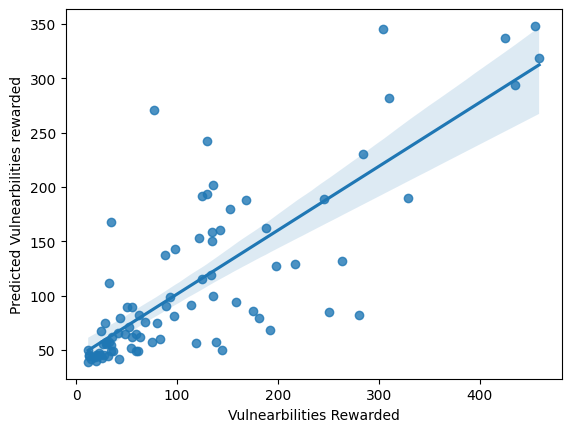

In [12]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def ols(df: pd.DataFrame):
    # Create a linear regression object
    model = LinearRegression()
    X = df.loc[:, ['Number People', 'Hall of Famers',
                   'Average Payout', 'Validation Within']]

    y = df['Vulnearbilities Rewarded']

    # model formula looks as followed:
    # prediction = intercept + coefficient_1 * Number_people + coefficient_2 * Hall_of_famers + coefficient_3 * Average_payout + coefficent_4 * Validation Within

    # scaling
    scaler = StandardScaler()

    # Fit the scaler to the data
    scaler.fit(X)

    # Transform the data using the scaler
    X = scaler.transform(X)

    # Fit the linear regression
    model.fit(X, y)

    # Print the coefficients
    print("Interception", model.intercept_)
    print("Coefficents", model.coef_)
    print("Model score", model.score(X, y))

    return model, X, y


def metrics(X, y, model):
    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R^2 Score:", r2)


def visualize(model, df: pd.DataFrame, X):
    predicated_vulnearbilities_rewarded = model.predict(X)
    sns.regplot(x='Vulnearbilities Rewarded',
                y=predicated_vulnearbilities_rewarded, data=df)
    plt.xlabel('Vulnearbilities Rewarded')
    plt.ylabel('Predicted Vulnearbilities rewarded')
    plt.show()


def main():
    df = pd.read_excel(r"C:\Users\eva-k\Documents\Studium\TUM\Master MMT\5. Semester\Cybercrime\data-analytics-bugcrowd\data-octa\bugcrowd_modified_24.12.xlsx")
    print(df.columns)
    #clean reward range
    df['Reward Range'] = df['Reward Range'].str.replace(",", "")

    # replacing placeholders with np values againa
    df["Average Payout"] = df["Average Payout"].replace(0, np.nan)
    df["Number People"] = df["Number People"].replace(0, np.nan)
    df["Hall of Famers"] = df["Hall of Famers"].replace(0, np.nan)

    # looking at the smaller programs
    df = df.where(df['Vulnearbilities Rewarded'] <= 500)

    df = df.dropna(subset=['Hall of Famers', 'Number People',
                           'Validation Within', 'Average Payout', 'Vulnearbilities Rewarded'])
    df['Validation Within'] = df['Validation Within'].astype(int)
    df['Vulnearbilities Rewarded'] = df["Vulnearbilities Rewarded"].astype(int)

    # dependent variable is vulnearbilities_rewarded
    # independent variable is average_payout, number_people, hall_of_famers,

    results, X, y = ols(df)
    metrics(X, y, results)

    visualize(results, df, X)

    # output: vulnearbilities_rewarded = 0.8564153381222468 + 0.246376072 * average_payout - 0.0000141271570 * number_people + 0.0000179166772 * hall_of_famers


if __name__ == '__main__':
    main()
